In [34]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm

In [35]:
# read data
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [36]:
# Check data information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [37]:
# Check missing value
diabetes.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [41]:
# Check data type
diabetes.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [42]:
# unique
diabetes['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [43]:
diabetes['heart_disease'].unique()

array([1, 0], dtype=int64)

In [44]:
# chage data tyoe from object to category
cat_features = ['gender', 'smoking_history']
diabetes[cat_features]= diabetes[cat_features].astype('category')
diabetes.dtypes

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

In [62]:
diabetes['gender'].unique()

['Female', 'Male', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

In [45]:
# statistik analisis
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: title={'center': 'age'}, xlabel='diabetes'>

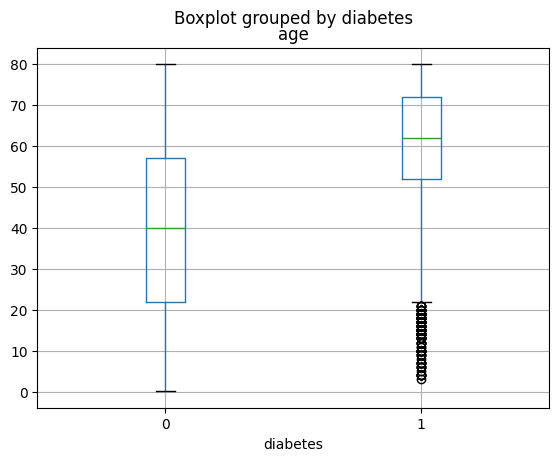

In [46]:
diabetes.boxplot(column='age',
              by='diabetes')

In [47]:
diabetes.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


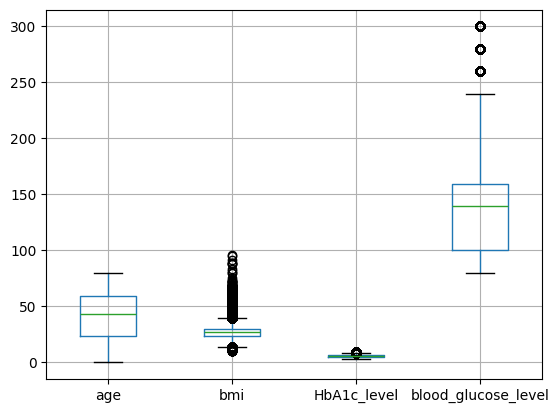

In [48]:
# mengelompokan data yg bersifat angka namum bukan tingkatan ataupun katagori
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
diabetes.boxplot(column=num_features);


In [49]:
for col in cat_features: # perulangan
    print(col, diabetes[col].unique().tolist())

gender ['Female', 'Male', 'Other']
smoking_history ['never', 'No Info', 'current', 'former', 'ever', 'not current']


Mari kita kategorikan terlebih dahulu mana kolom kategori yang nominal atau ordinal
- Nominal: gender
- Ordinal: smoking_history

In [50]:
smoking_history_order = ['current', 'not current', 'former', 'ever', 'never','No Info']

In [51]:
from sklearn.preprocessing import OrdinalEncoder

diabets_ord_enc = OrdinalEncoder(categories = [smoking_history_order])

In [52]:
diabetes[['smoking_history']] = diabets_ord_enc.fit_transform(diabetes[['smoking_history']])

In [20]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [21]:
diabetes['gender'] = encode.fit_transform(diabetes['gender'].values)
diabetes['smoking_history'] = encode.fit_transform(diabetes['smoking_history'].values)
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [22]:
y = diabetes['diabetes'] # Terget
x = diabetes.drop(columns='diabetes') # isi dengan nama kolom yang tidak menjadi prediktor

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=100)

In [24]:
# Standarization
from sklearn.preprocessing import StandardScaler

# Membuat objek standar scaler
diabetes_ss = StandardScaler()

# Melakukan .fit() untuk memetakan mean dan std
# Ingat! .fit() hanya dilakukan di data train
diabetes_ss.fit(x_train[num_features])

# Standarisasi nilai numerik baik di data train dan data test
x_train[num_features] = diabetes_ss.transform(x_train[num_features])
x_test[num_features] = diabetes_ss.transform(x_test[num_features])

x_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
14837,0,0.499510,0,0,0,0.192266,0.531247,0.410922
649,1,0.766308,0,0,0,0.000382,-1.424234,-1.302459
25783,1,1.122037,0,0,1,-0.731730,0.996837,-1.424843
743,0,1.344369,0,0,0,0.000382,-0.679289,-0.201000
34399,0,-0.745544,0,0,4,0.341345,0.996837,0.533306


In [25]:
# Import library SVM
from sklearn import svm
# membuat model SVC
model_svc = svm.SVC()

In [26]:
# model fitting
model_svc.fit(X = x_train, y = y_train)

SVC()

In [27]:
# Membuat model prediction
y_pred_test = model_svc.predict(x_test)
y_pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
y_test.head(10)

42784    0
43400    0
78212    0
94175    0
8334     0
44353    0
54589    0
33440    0
48348    0
77561    0
Name: diabetes, dtype: int64

In [29]:
# Model Evaluation
model_svc.score(x_train,y_train)

0.9626995683602891

In [30]:
model_svc.score(x_test, y_test)

0.9625585023400937

In [59]:
ydata = pd.DataFrame()
ydata['y_test'] = pd.DataFrame(y_test)
ydata
ydata['y_pred_test'] = y_pred_test
ydata

,y_test,y_pred_test
42784,0,0
43400,0,0
78212,0,0
94175,0,0
8334,0,0
...,...,...
33474,0,0
3249,0,0
92356,0,0
9718,0,0


In [61]:
ydata.to_csv('Prediksi.csv')

In [57]:
ydata = pd.DataFrame()
#ydata['y_test'] = pd.DataFrame(y_test)
#ydata
ydata['y_pred_test'] = pd.DataFrame(y_pred_test)
ydata.head(10)

,y_pred_test
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [66]:
# membandingkan hasil prediksi dengan data sebenarnya
cm = confusion_matrix(y_test,y_pred_test) 
cm

array([[17509,    11],
       [  709,  1001]], dtype=int64)

- hasil perdiksi dan data asli 0 : sebanyak 17509 data
- hasil prediksi dan data asli 1 : sebanyak 1001 data
- hasil prediksi 0, dan data asli 1 : sebanyak 11 data
- hasil prediksi 1, dan data asli 0 : sebanyak 709 data

In [67]:
#Evaluasi Akurasi
akurasi = classification_report(y_test,y_pred_test)
akurasi

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98     17520\n           1       0.99      0.59      0.74      1710\n\n    accuracy                           0.96     19230\n   macro avg       0.98      0.79      0.86     19230\nweighted avg       0.96      0.96      0.96     19230\n'